# Viewer

## Get File List

In [1]:
from utils.get_file_names import get_file_names
from project_config import (
    ITERATE_1_ANTHROPIC_DIR,
    SIMILARITY_METRICS_ITERATE_1_ANTHROPIC_DIR,
)

files_dir = SIMILARITY_METRICS_ITERATE_1_ANTHROPIC_DIR

file_list = get_file_names(files_dir, True)
file_list

['C:\\github\\job_bot\\input_output\\evaluation_optimization\\evaluation_optimization_by_anthropic\\iteration_1\\similarity_metrics\\Adobe_Sr__Director__Applied_AI_ML__Discovery__sim_metrics_iter1.csv',
 'C:\\github\\job_bot\\input_output\\evaluation_optimization\\evaluation_optimization_by_anthropic\\iteration_1\\similarity_metrics\\Airtable_Product_Manager__AI_sim_metrics_iter1.csv',
 'C:\\github\\job_bot\\input_output\\evaluation_optimization\\evaluation_optimization_by_anthropic\\iteration_1\\similarity_metrics\\Amazon_Product_Manager__Artificial_General_Intelligence_-_Data_Services_sim_metrics_iter1.csv',
 'C:\\github\\job_bot\\input_output\\evaluation_optimization\\evaluation_optimization_by_anthropic\\iteration_1\\similarity_metrics\\Amazon_Research_Manager_-_Strategy_and_Insights_GCA_Marketing_sim_metrics_iter1.csv',
 'C:\\github\\job_bot\\input_output\\evaluation_optimization\\evaluation_optimization_by_anthropic\\iteration_1\\similarity_metrics\\Amazon_Sr__Generative_AI_Strat

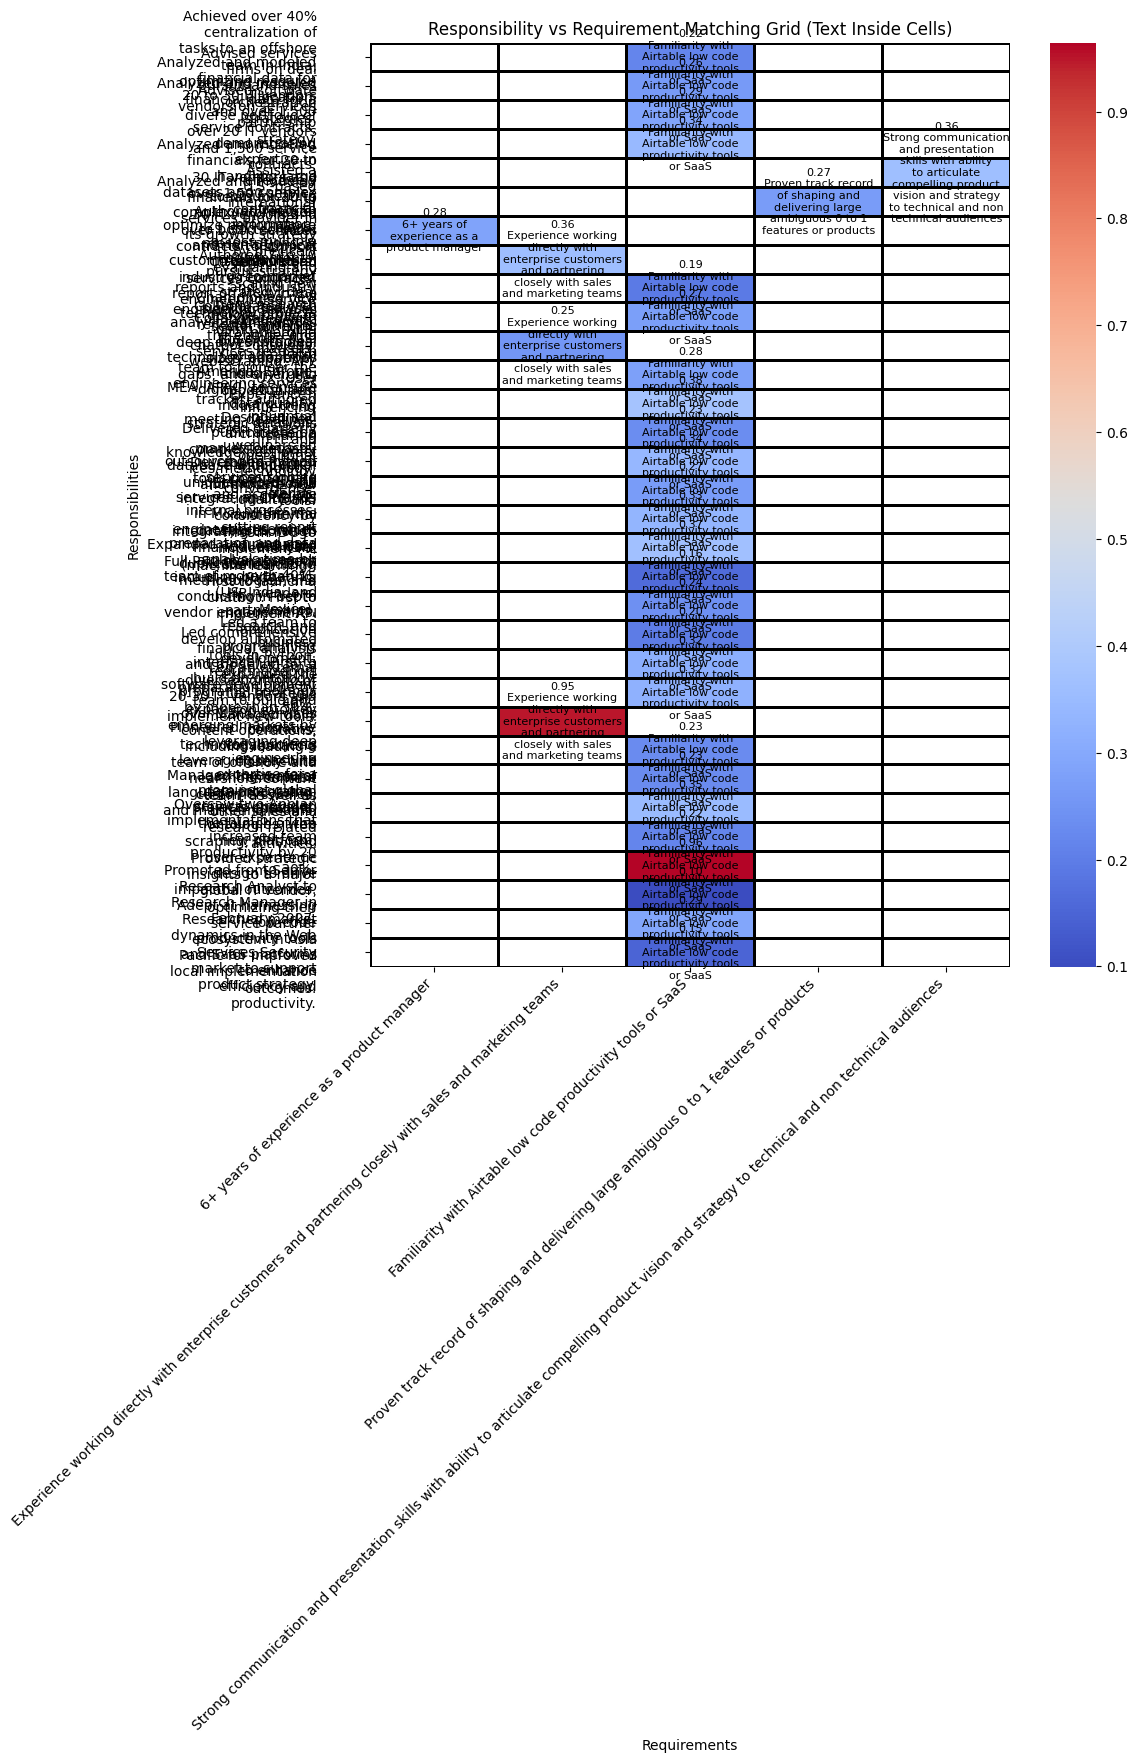

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Load similarity metrics CSV
file_path = file_list[1]  # Replace with your actual file path
df = pd.read_csv(file_path)

# Pivot the data to match heatmap format
pivot_df = df.pivot(
    index="responsibility", columns="requirement", values="composite_score"
)

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 12))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(
    pivot_df,
    annot=False,
    fmt=".2f",
    cmap=cmap,
    linewidths=1,
    linecolor="black",
    cbar=True,
    ax=ax,
)


# Function to wrap text inside heatmap cells
def wrap_text(text, width=20):
    return "\n".join(textwrap.wrap(str(text), width))


# Wrap y-axis labels
wrapped_y_labels = [textwrap.fill(label, width=20) for label in pivot_df.index]
ax.set_yticklabels(wrapped_y_labels, rotation=0)

# Overlay text inside each cell (display composite score + wrapped requirement)
for i, res in enumerate(pivot_df.index):
    for j, req in enumerate(pivot_df.columns):
        match = df[(df["responsibility"] == res) & (df["requirement"] == req)]
        if not match.empty:
            score = match.iloc[0]["composite_score"]
            req_text = wrap_text(match.iloc[0]["requirement"], width=20)
            display_text = f"{score:.2f}\n{req_text}"
            ax.text(
                j + 0.5,
                i + 0.5,
                display_text,
                ha="center",
                va="center",
                fontsize=8,
                color="black",
            )

# Formatting adjustments
ax.set_title("Responsibility vs Requirement Matching Grid (Text Inside Cells)")
ax.set_xlabel("Requirements")
ax.set_ylabel("Responsibilities")


plt.xticks(rotation=45, ha="right")

# Increase left margin
plt.subplots_adjust(left=0.5)


plt.show()

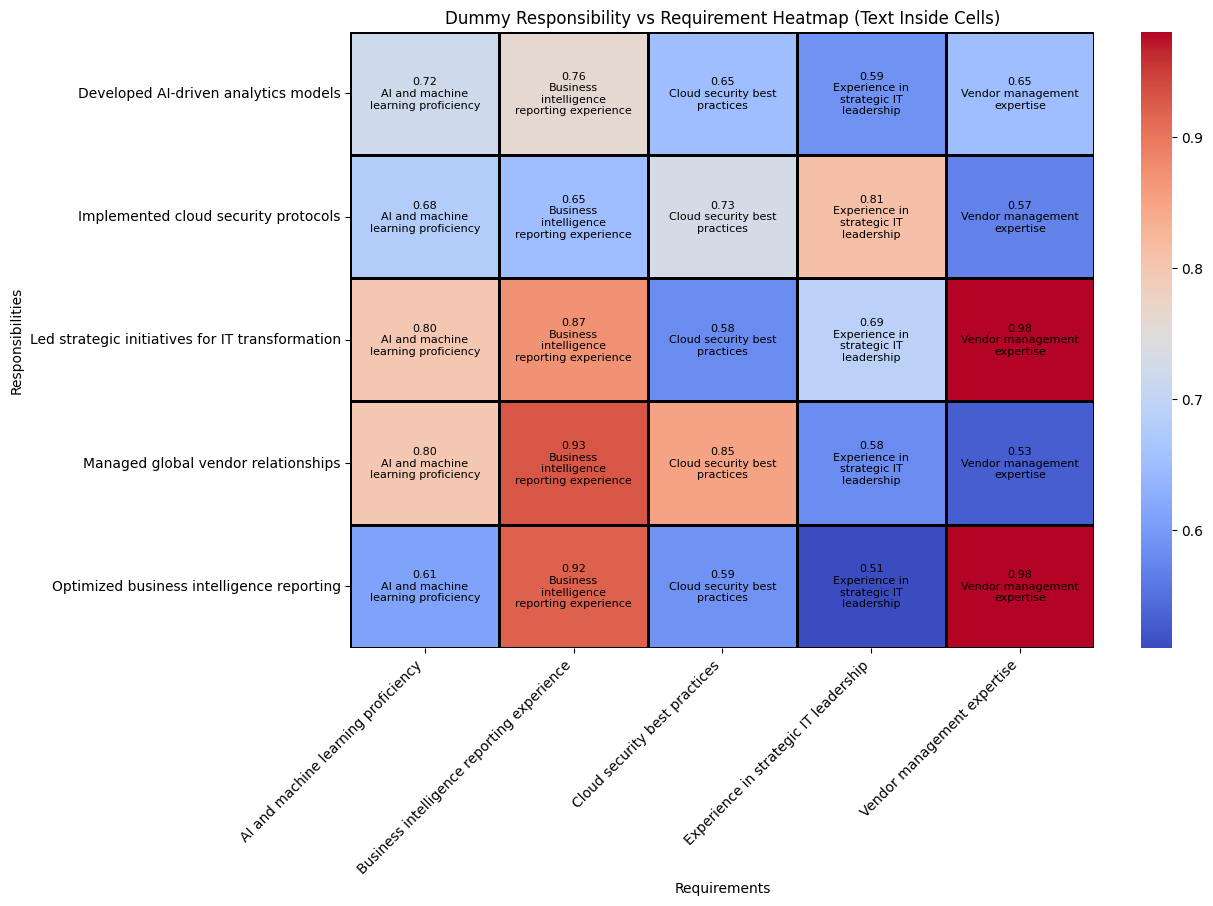

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import numpy as np

# Sample Responsibilities and Requirements
responsibilities = [
    "Led strategic initiatives for IT transformation",
    "Managed global vendor relationships",
    "Optimized business intelligence reporting",
    "Developed AI-driven analytics models",
    "Implemented cloud security protocols",
]

requirements = [
    "Experience in strategic IT leadership",
    "Vendor management expertise",
    "Business intelligence reporting experience",
    "AI and machine learning proficiency",
    "Cloud security best practices",
]

# Generate random similarity scores between 0.5 and 1.0
np.random.seed(42)
data = []
for res in responsibilities:
    for req in requirements:
        data.append(
            {
                "responsibility": res,
                "requirement": req,
                "composite_score": round(np.random.uniform(0.5, 1.0), 2),
            }
        )

# Convert to DataFrame
df_dummy = pd.DataFrame(data)

# Pivot table for heatmap
pivot_df = df_dummy.pivot(
    index="responsibility", columns="requirement", values="composite_score"
)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Define color scheme

# Generate heatmap
sns.heatmap(
    pivot_df,
    annot=False,
    fmt=".2f",
    cmap=cmap,
    linewidths=1,
    linecolor="black",
    cbar=True,
    ax=ax,
)


# Function to wrap text inside heatmap cells
def wrap_text(text, width=20):
    return "\n".join(textwrap.wrap(str(text), width))


# Overlay text inside each cell (score + requirement)
for i, res in enumerate(pivot_df.index):
    for j, req in enumerate(pivot_df.columns):
        match = df_dummy[
            (df_dummy["responsibility"] == res) & (df_dummy["requirement"] == req)
        ]
        if not match.empty:
            score = match.iloc[0]["composite_score"]
            req_text = wrap_text(
                match.iloc[0]["requirement"], width=20
            )  # Wrap text for better display
            display_text = f"{score:.2f}\n{req_text}"  # Display similarity score + wrapped requirement text

            ax.text(
                j + 0.5,
                i + 0.5,
                display_text,
                ha="center",
                va="center",
                fontsize=8,
                color="black",
            )

# Formatting adjustments
ax.set_title("Dummy Responsibility vs Requirement Heatmap (Text Inside Cells)")
ax.set_xlabel("Requirements")
ax.set_ylabel("Responsibilities")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()